## Learning Portfolio 4 Map coloring the map of Canada and U.S. 
Learning portfolio 4 is using Networkx to assign the color index to each state and province, finally visualized by the online map color app and the Choropleth maps on python. The aim is to color the states by using less colors.

### Step 1: Assign a label to each province.
Here I use the map chart to get the map with each province are labelled as the name.
Resource: $ \href{https://www.mapchart.net/canada.html}{Map \ Chart\ Coloring} $

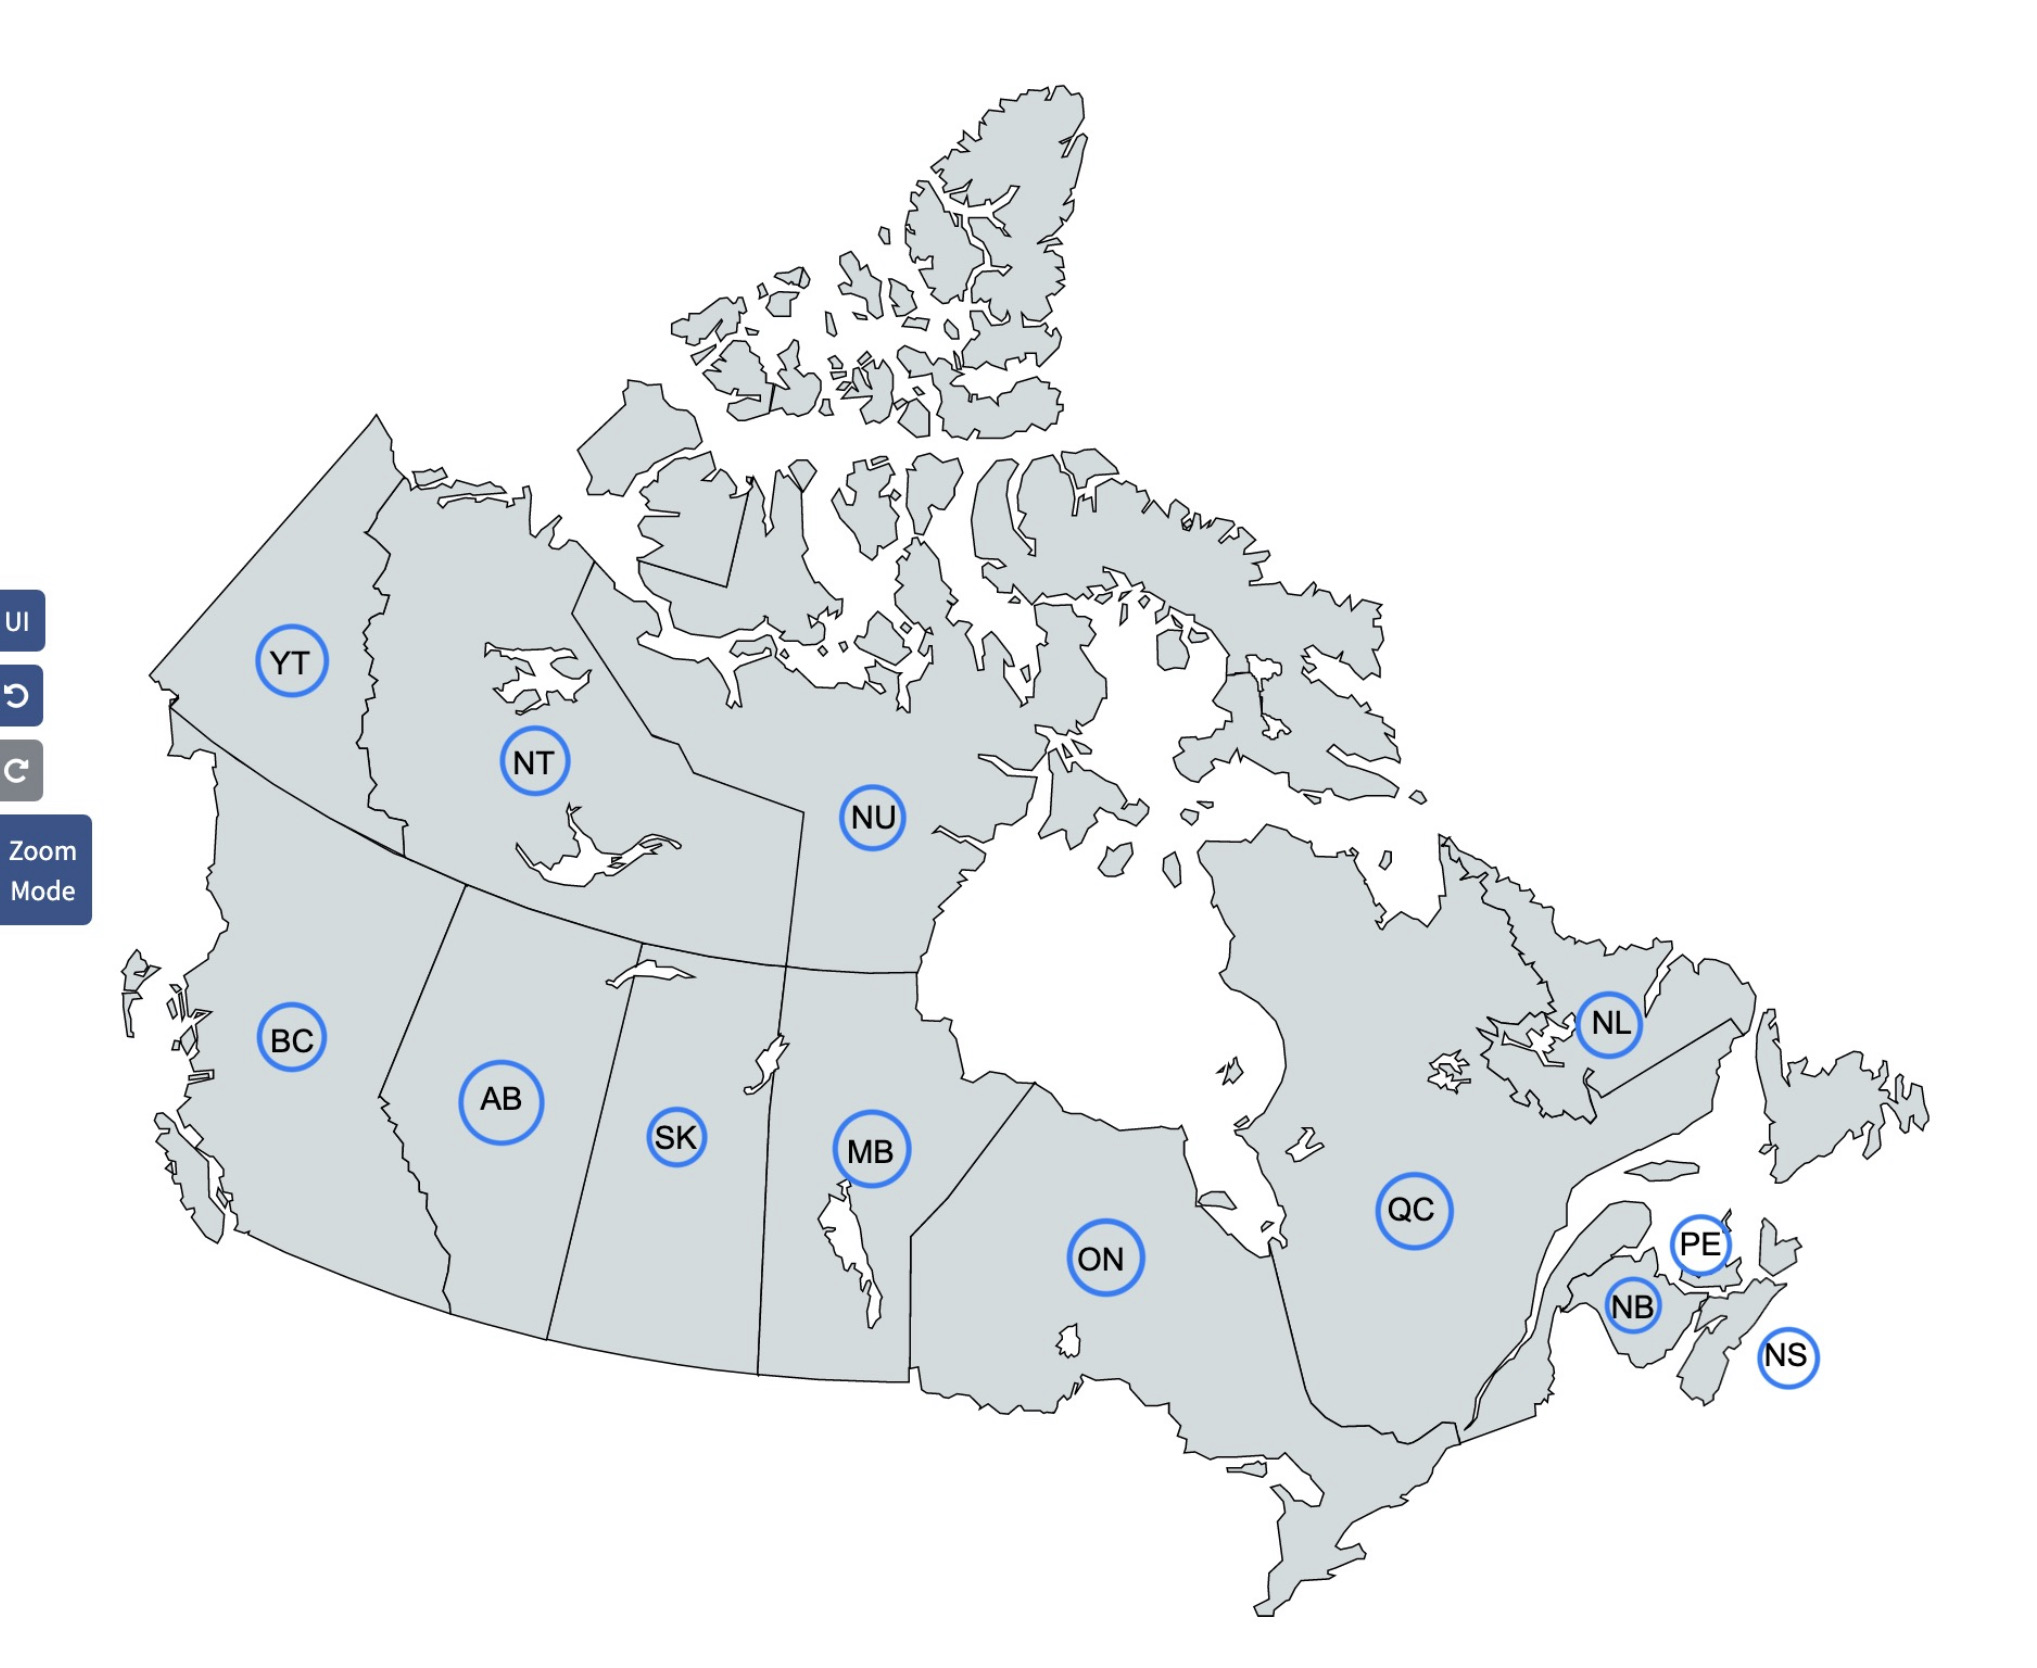

### Step 2: Connect the continent that share the borders.
I connected the continent that shares at least one borders. 

For example, NT is in the middle of Yukon and NU, which meas that NT shares the border (left and right) with Yukon and NU respectively. Therefore, we can connect NT & YT, NT & NU. We can not find a way from Yukon directly to Nunavut, so that there is no vertices between YT and NU.

The connection is draw by myself on ipad

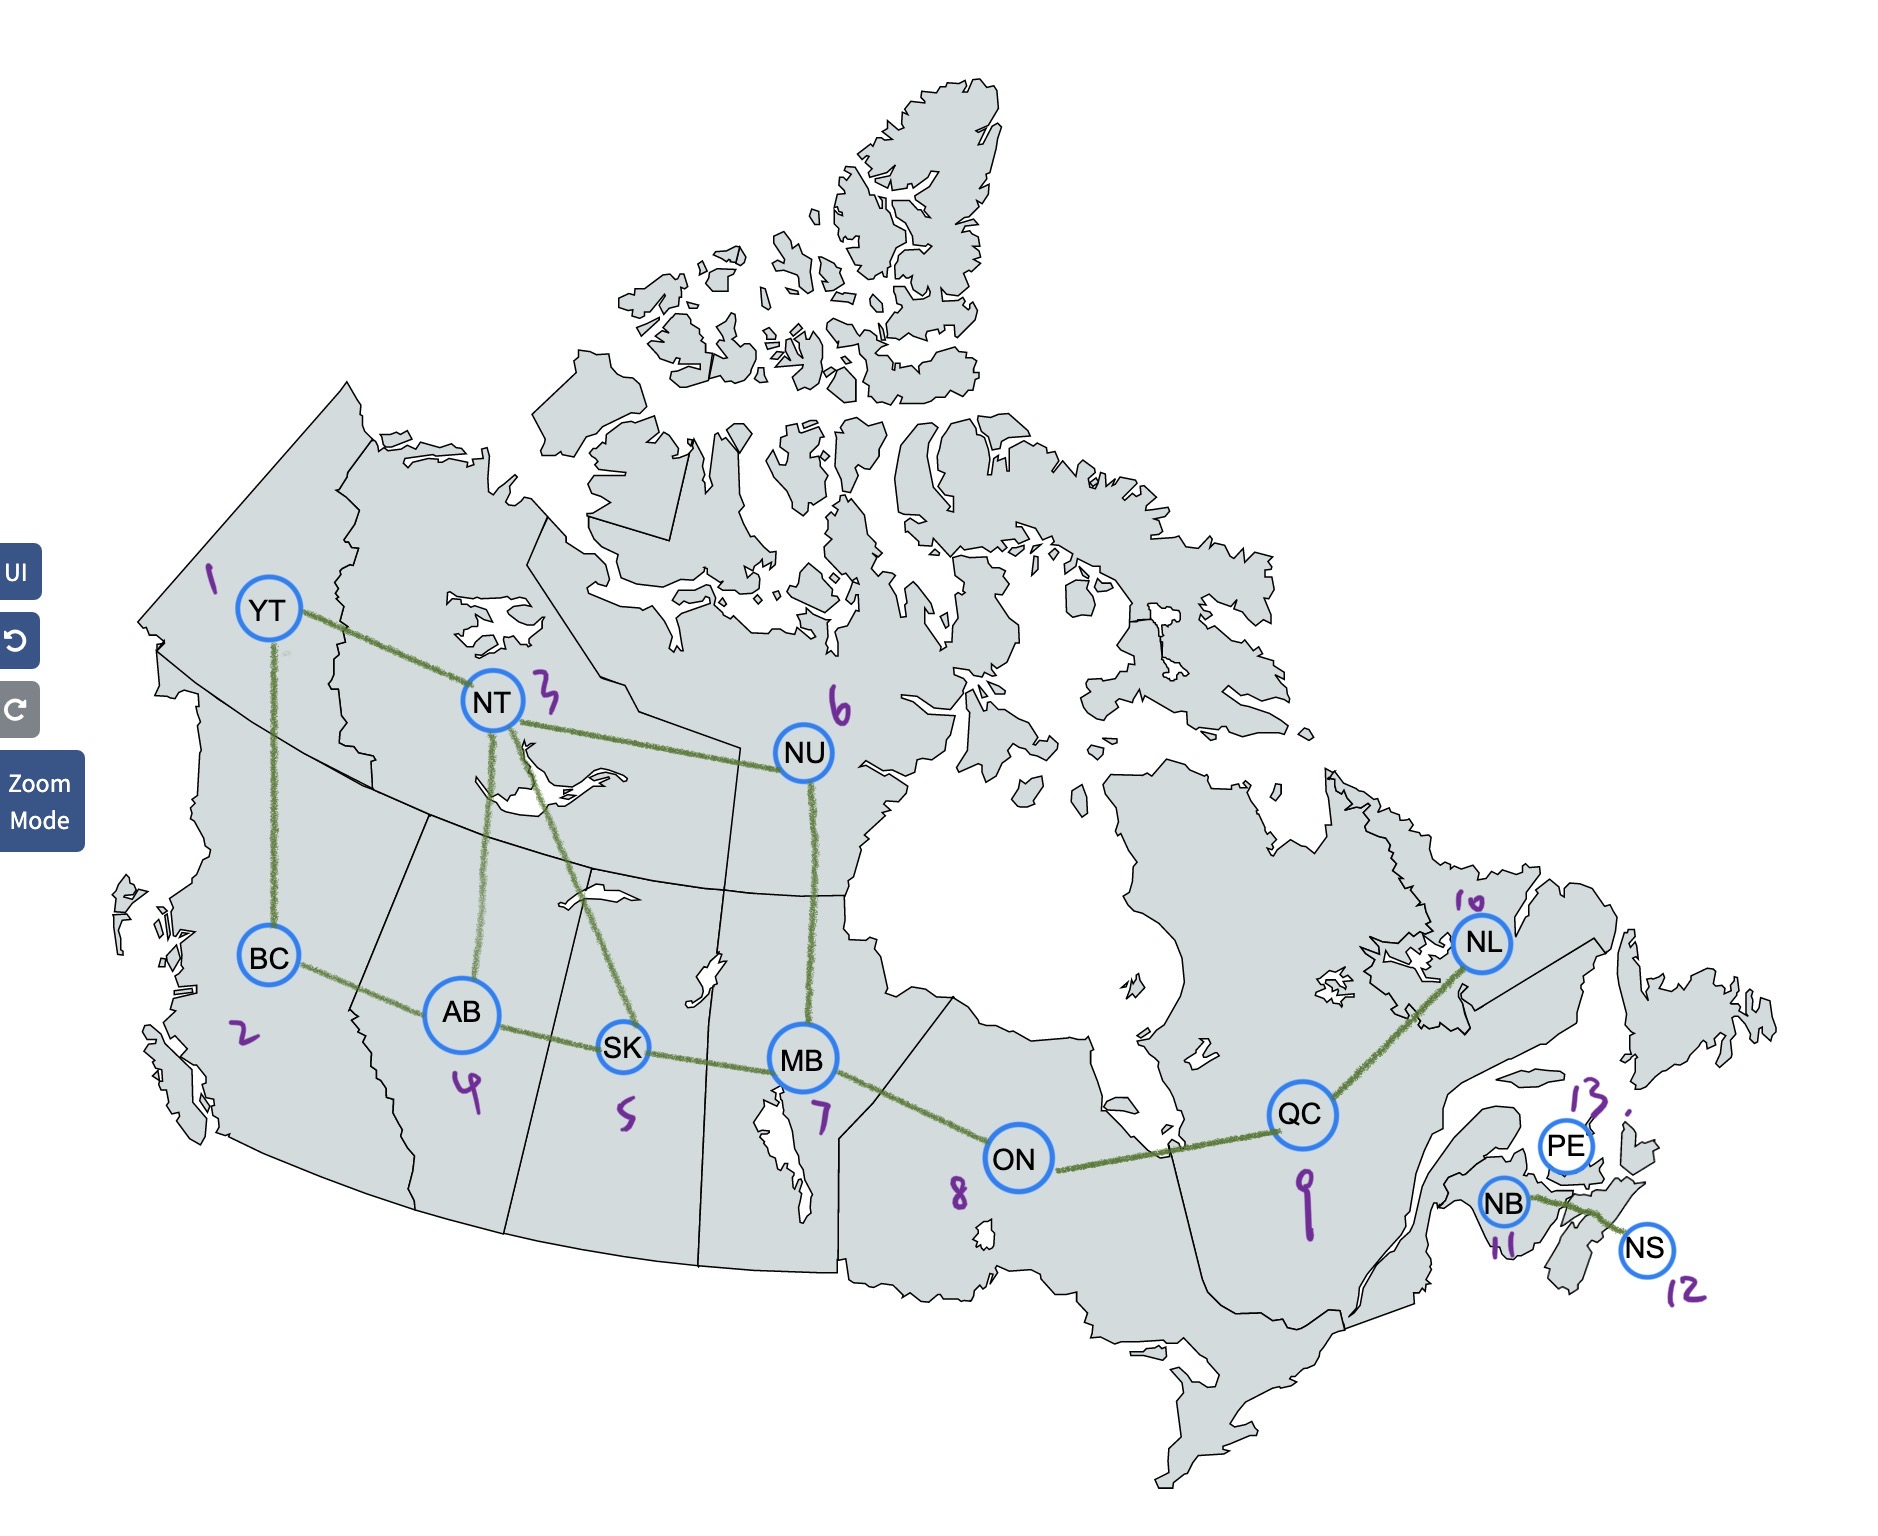

### Step 3: Use the procedure for coloring a graph

In [1]:
import networkx as nx

In [2]:
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt

The original graph: 


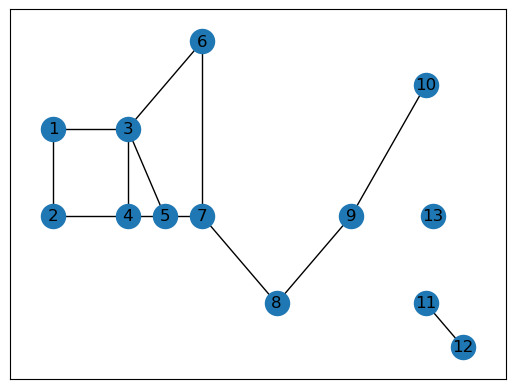

In [3]:
province = 13
edges = [(1,2),(1,3),(2,4),(3,4),(3,5),(3,6),(4,5),(5,7),(6,7),(7,8),(8,9),(9,10),(11,12)]
G = nx.Graph()
G.add_nodes_from(range(1,province+1))
G.add_edges_from(edges)

## get the original graph 

pos = {1:(0,1), 2: (0,0), 3: (1,1), 4: (1,0), 5: (1.5, 0), 6: (2,2), 7:(2,0), 8:(3,-1), 9:(4,0),
       10:(5, 1.5), 11: (5, -1), 12: (5.5, -1.5), 13: (5.1, 0)} ## simulates the map position

print("The original graph: ") 
nx.draw_networkx(G, pos) 


I use the algorithm of greedy colour in Networkx, which can be used as C = x.greedy_color(G). It attempts to colour a graph using as few colours as possible; the colour will not be the same if two nodes are neighbours. The output of C [the index number of nodes (province in this case)] would be an integer number from 0 to ...

In [4]:
def Coloring_map(graph):

    C = nx.greedy_color(graph)
    n = len(graph)
    colors = []
    for i in range(1, n+1):
        colors.append(C[i])
    print("After map coloring: ")
    nx.draw_networkx(G,pos,node_color=colors,cmap=plt.cm.Oranges)


### Step 4: Run the function code

After map coloring: 


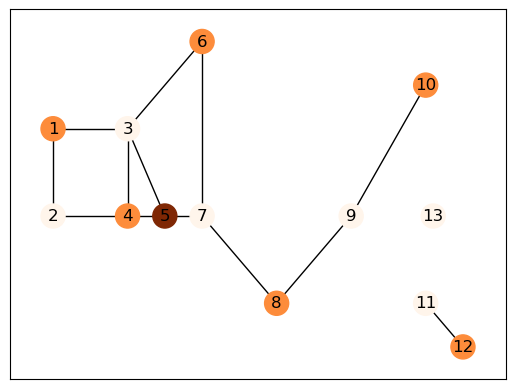

In [5]:
Coloring_map(G)

## Final step: Coloring
As we can see that the map has been colored by only three colors.

I am using the Resource: $ \href{https://www.mapchart.net/canada.html}{Map \ Chart\ Coloring} $ to fill the map color manually.

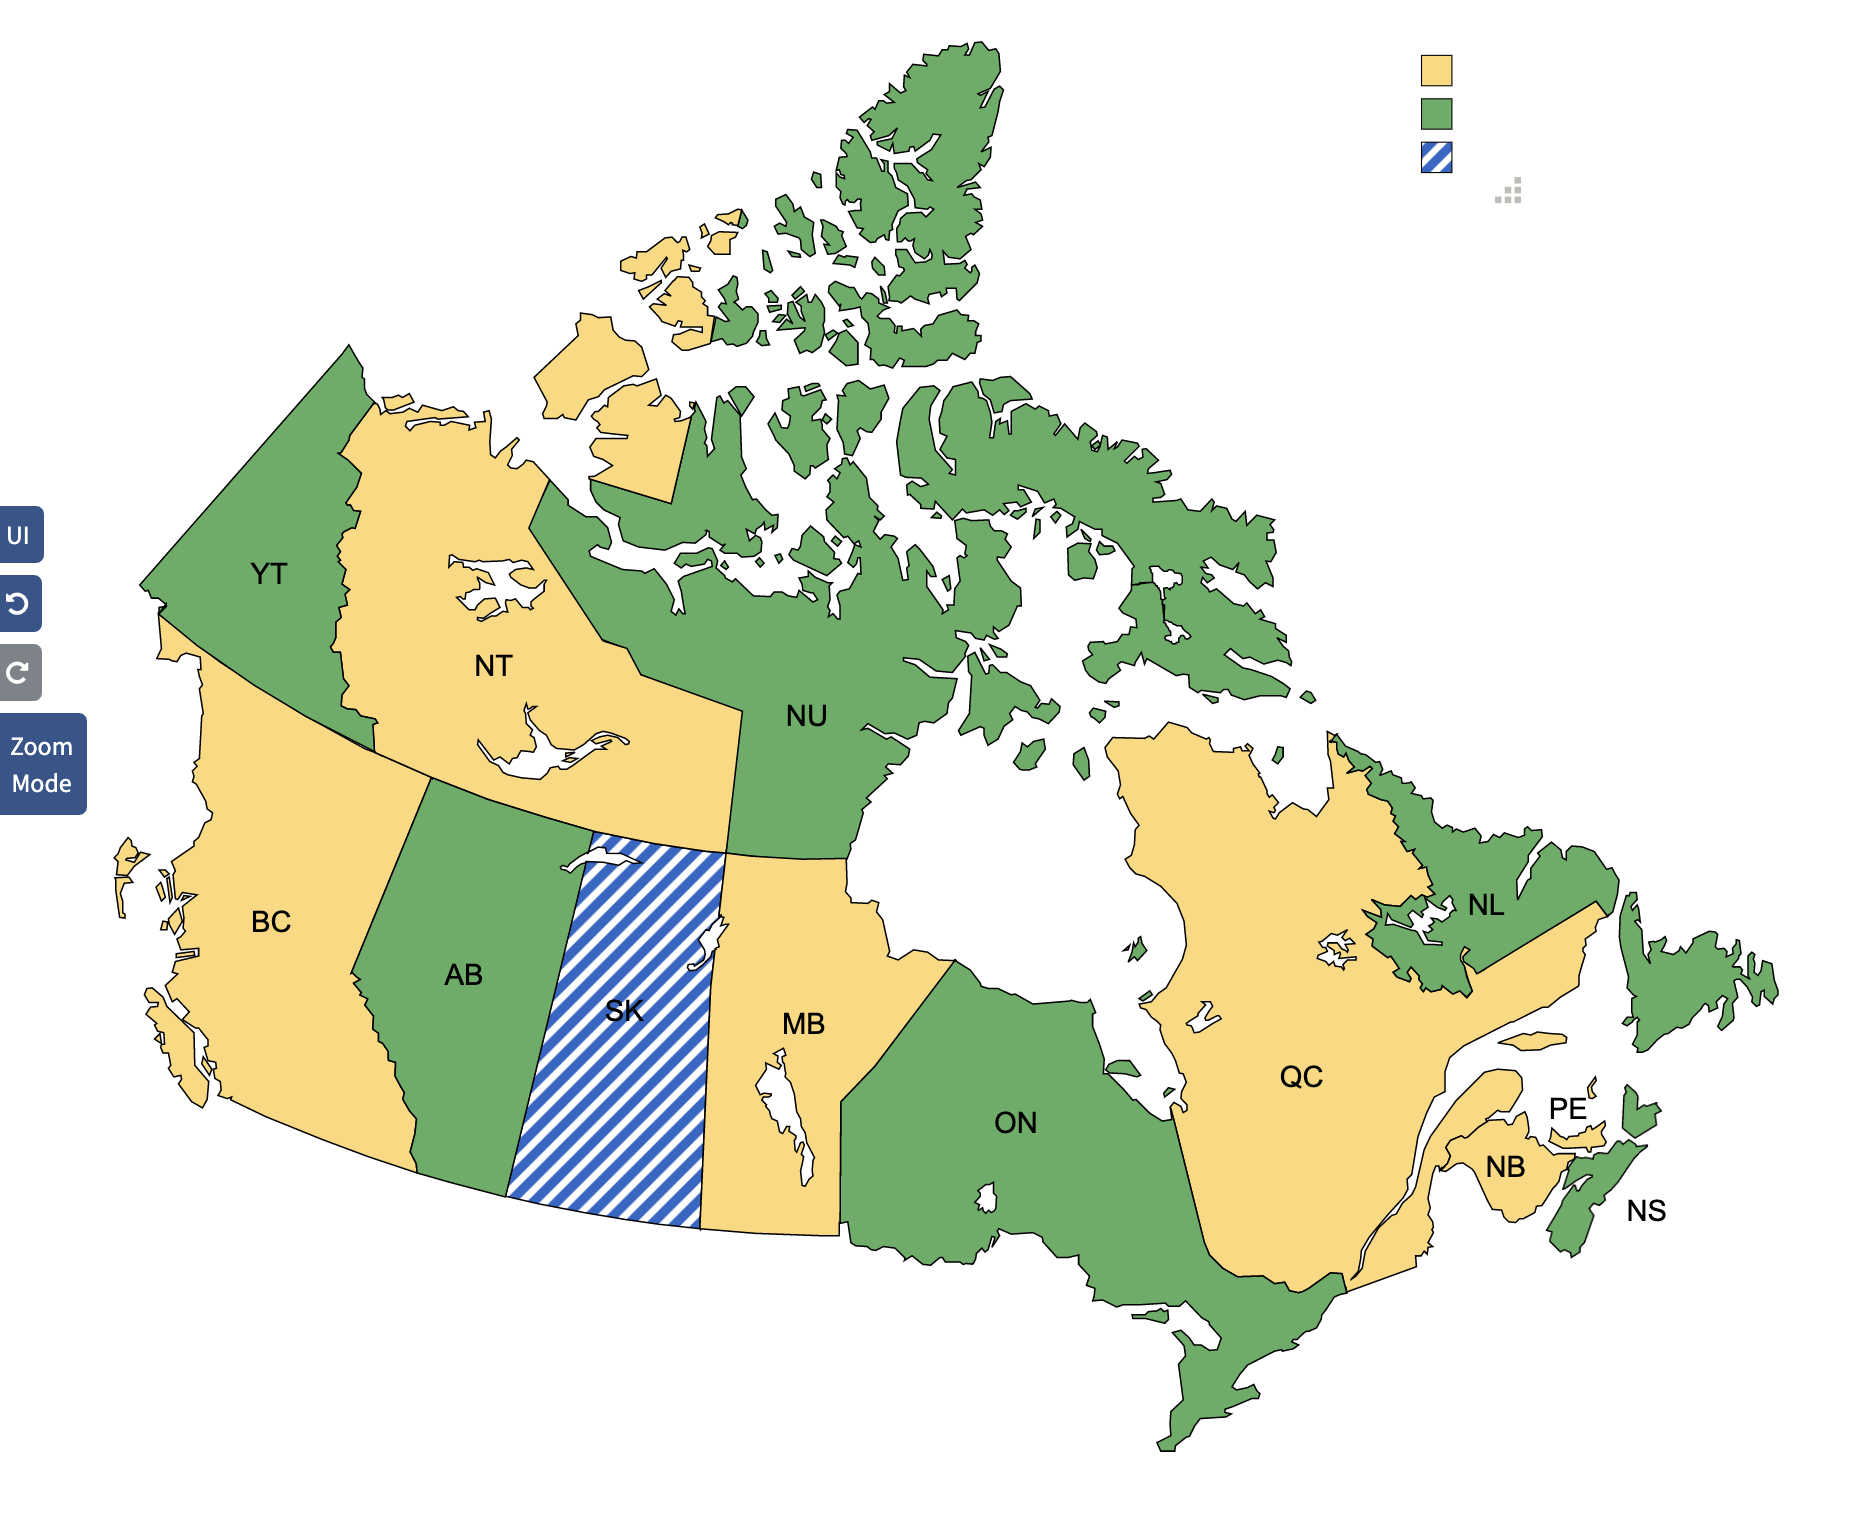

## More examples on Map Coloring for U.S.

In [6]:
import folium
import pandas as pd
import json

### Imports the Data

- neighbors-states.csv: Source from $ \href{https://github.com/ubikuity/List-of-neighboring-states-for-each-US-state/blob/master/neighbors-states.csv}{Neighbors}$ records the neighbor relation of US 50 states.
- US state.csv: The list of US states, the file will records the color of each states later, and read in the folium.Choropleth to assign the states with same number as the same color. 

In [7]:
#read csv
data = pd.read_csv('neighbors-states.csv')
state = pd.read_csv('US state.csv')

In [8]:
data.head()

,StateCode,NeighborStateCode
0,AK,WA
1,AL,FL
2,AL,GA
3,AL,MS
4,AL,TN


In [18]:
state.head()

,US States,colors index
0,AL,2
1,AK,0
2,AZ,2
3,AR,2
4,CA,0


In [10]:
start_list = data['StateCode'].tolist() 
Neighbor = data['NeighborStateCode'].tolist()

#get the list of states name
US_state_list = state['US States'].tolist()

num_state = len(US_state_list) #number of states
num_edges = len(start_list) #number of edges is the row number of neighbors states

### Make graph

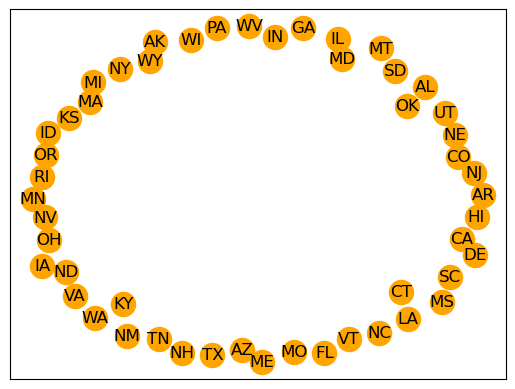

In [11]:
#make a new graph on Networkx US_graph
US_graph = nx.Graph()

#add the nodes of 50 states and make it in color orange
US_graph.add_nodes_from((US_state_list))
nx.draw_networkx(US_graph, node_color = 'Orange') 

For each edges, it is from state to another states, I use data[column][i] to search for the name of state in csv, and add edge of each neighor of state.

In [12]:

for i in range(num_edges):
    start = data['StateCode'][i]
    end = data['NeighborStateCode'][i]
    #print("i = ")
    #print(i)
    #print("start =  ")
    #print(start)
    #print("end = ")
    #print(end)
    US_graph.add_edge(start, end)

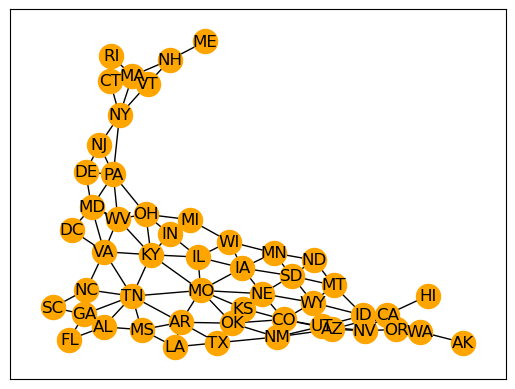

In [13]:
nx.draw_networkx(US_graph, node_color = 'Orange') 

### Assign Colors

nx.greedy_color() decided the color by number 0,1,2,3... 

In this case, US states can be paint in total four colors.

In [14]:
C = nx.greedy_color(US_graph)

### Get the Color List

In [15]:
C = nx.greedy_color(US_graph)
color_in_order = []
for i in range(num_state):
    name = state['US States'][i] # search for the name of the states, for example "MO"
    color_index = C[name]  #C["MO"] returns its number
    color_in_order.append(color_index) # stores the number inside color_in_order

### Add a column to the csv file state 

- Add to the second column and named "color index", the value inserts on that column is the color number in the states order, this step is for the map coloring in Choropleth.

- here if we run again state.head(), we can see the column has been added in the csv.

In [16]:
state.insert(1, column = "colors index", value = color_in_order)

- GeoJson source of the file us-states: $ \href{https://www.kaggle.com/datasets/pompelmo/usa-states-geojson}{Kaggle \ Resource}$ 

- Map coloring learning resource:$ \href{https://python-visualization.github.io/folium/quickstart.html}{Choropleth \ maps}$

### Final Map Colored

In [17]:
state_geo = 'us-states.json'

m = folium.Map(location=[37,-102], zoom_start=4)

folium.Choropleth(state_geo).add_to(m)

state_data = state #the csv file read

folium.Choropleth(
    geo_data=state_geo, #cvs file
    name ="choropleth", 
    data =state_data, 
    columns =["US States", "colors index"], #data read the column of US States and color index
    key_on ="feature.id",
    fill_color ="YlGn", #set the color
    fill_opacity =0.7,
    line_opacity =0.3,
    legend_name ="Colors used",
).add_to(m)

folium.LayerControl().add_to(m)

m

Through the map, we can use only four colors to color the US map, and the states shares a boarder alwasys has different color.